# Ch 02 Q10

This exercise involves the **Boston housing data set**.


### (a)
To begin, load in the `Boston` data set, which is part of the **ISLP** library.


In [1]:

import pandas as pd
from ISLP import load_data

# 載入 Boston housing data
boston = load_data('Boston')

# 檢視前五列
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


### (b)
How many rows are in this data set? How many columns?  
What do the rows and columns represent?


In [3]:

# 檢視資料的列數與欄數
print(boston.shape)

(506, 13)


* **Rows (506):** Each row is one Boston-area suburb (census tract).
* **Columns (13):** Variables describing each suburb:

  * `crim`: per capita crime rate by town
  * `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
  * `indus`: proportion of non-retail business acres per town
  * `chas`: Charles River dummy (1 if tract bounds river; 0 otherwise)
  * `nox`: nitric oxides concentration (parts per 10 million)
  * `rm`: average number of rooms per dwelling
  * `age`: proportion of owner-occupied units built prior to 1940
  * `dis`: weighted distances to five Boston employment centers
  * `rad`: index of accessibility to radial highways
  * `tax`: full-value property tax rate per \$10,000
  * `ptratio`: pupil–teacher ratio by town
  * `lstat`: % of lower status of the population
  * `medv`: median value of owner-occupied homes (in \$1,000s)



### (c)
Make some pairwise scatterplots of the predictors (columns) in this data set.  
Describe your findings.

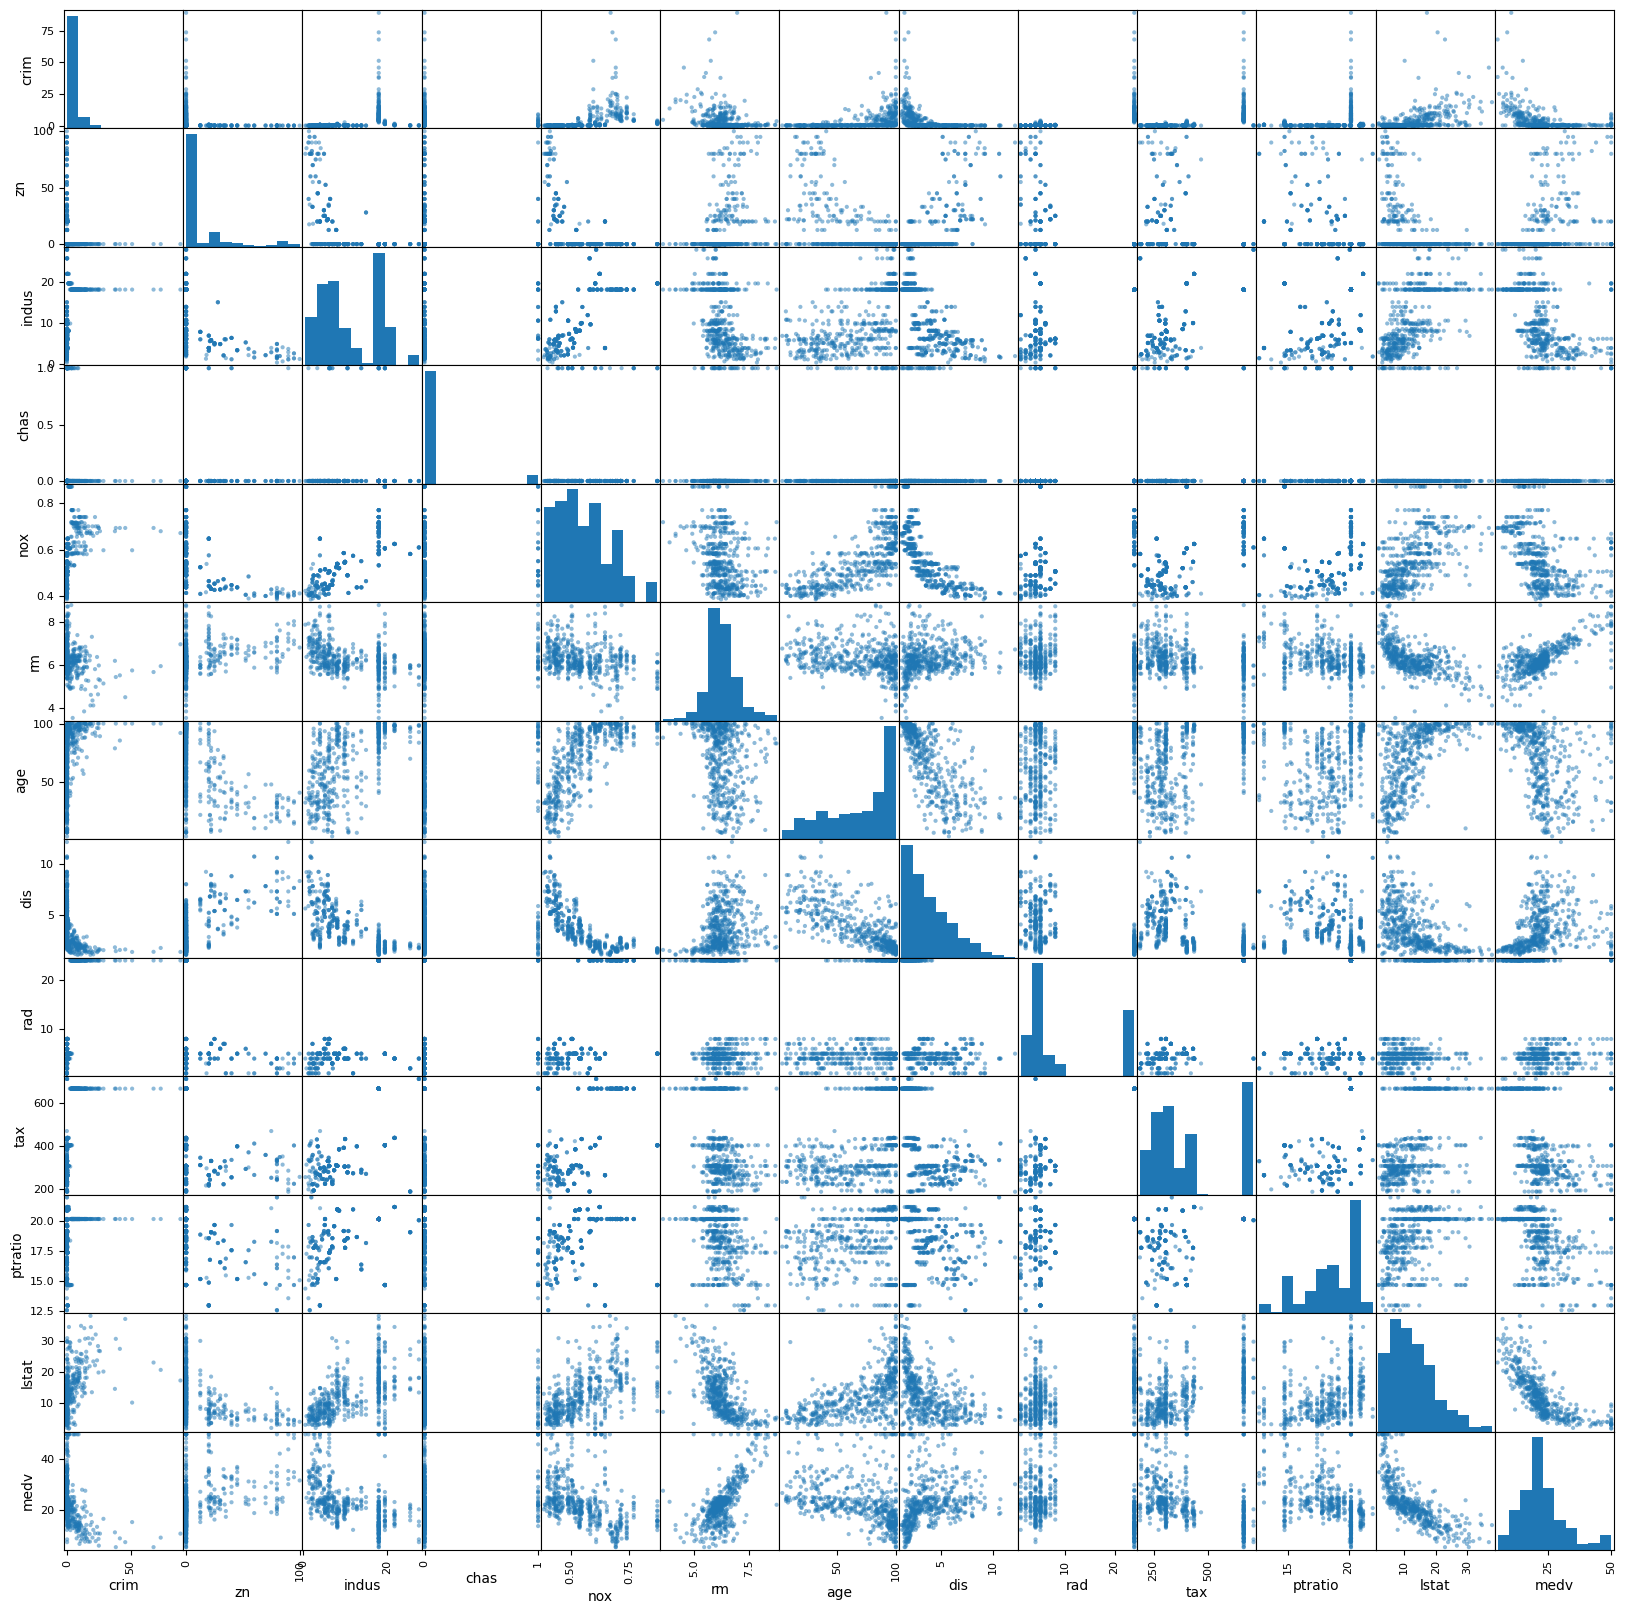

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create pairwise scatterplots for all columns
pd.plotting.scatter_matrix(boston, figsize=(20, 20), diagonal='hist')

plt.show()

### (d)
Are any of the predictors associated with per capita crime rate (`crim`)?  
If so, explain the relationship.


In [6]:
# Calculate correlation of each variable with crim
corr_with_crim = boston.corr(numeric_only=True)['crim'].sort_values(ascending=False)
print(corr_with_crim)


crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


* **Positive correlations with crime (`crim`)**

  * `rad` (index of access to radial highways): 0.63
  * `tax` (property tax rate): 0.58
  * `lstat` (lower-status population %): 0.46
  * `nox` (nitric oxides concentration): 0.42
  * `indus` (industrial land proportion): 0.41
  * `age` (old housing %): 0.35
  * `ptratio` (pupil–teacher ratio): 0.29
    Areas with more highways, higher property taxes, higher pollution, more industry, older housing, or more lower-status population generally have higher crime.

* **Negative correlations with crime (`crim`)**

  * `medv` (median home value): –0.39
  * `dis` (distance to employment centers): –0.38
  * `rm` (average rooms per dwelling): –0.22
  * `zn` (large-lot residential land %): –0.20
    Suburbs that are wealthier, farther from city centers, and have larger homes or more low-density zoning tend to have lower crime.

* `chas` (Charles River dummy) shows only a very weak negative correlation (–0.06), indicating little relationship.

Overall, crime rate is **positively associated** with industrial, densely populated, and less affluent areas, and **negatively associated** with affluent, spacious, and more distant suburbs.


### (e)
Do any of the suburbs of Boston appear to have particularly high crime rates?  
Tax rates?  
Pupil–teacher ratios?  
Comment on the range of each predictor.


In [7]:
# Display min and max of key predictors
print("Crime rate range:", boston['crim'].min(), "to", boston['crim'].max())
print("Tax rate range:", boston['tax'].min(), "to", boston['tax'].max())
print("Pupil–teacher ratio range:", boston['ptratio'].min(), "to", boston['ptratio'].max())

# Identify suburbs with exceptionally high values
print("\nSuburbs with crim > 50:")
print(boston[boston['crim'] > 50][['crim']])

print("\nSuburbs with tax = 711 or 666 (very high):")
print(boston[boston['tax'].isin([711, 666])][['tax']])

print("\nSuburbs with ptratio > 20:")
print(boston[boston['ptratio'] > 20][['ptratio']])


Crime rate range: 0.00632 to 88.9762
Tax rate range: 187 to 711
Pupil–teacher ratio range: 12.6 to 22.0

Suburbs with crim > 50:
        crim
380  88.9762
405  67.9208
410  51.1358
418  73.5341

Suburbs with tax = 711 or 666 (very high):
     tax
356  666
357  666
358  666
359  666
360  666
..   ...
488  711
489  711
490  711
491  711
492  711

[137 rows x 1 columns]

Suburbs with ptratio > 20:
     ptratio
13      21.0
14      21.0
15      21.0
16      21.0
17      21.0
..       ...
501     21.0
502     21.0
503     21.0
504     21.0
505     21.0

[201 rows x 1 columns]


We find:

* **Crime rate (`crim`)**

  * Range: **0.00632 to 88.98**.
  * Extremely high-crime suburbs include index 380 (88.98), 405 (67.92), 410 (51.14), and 418 (73.53), far above typical levels.

* **Property tax rate (`tax`)**

  * Range: **187 to 711**.
  * 137 suburbs have very high tax values of 666 or 711, much higher than the median.

* **Pupil–teacher ratio (`ptratio`)**

  * Range: **12.6 to 22.0**.
  * 201 suburbs have ratios above 20, indicating crowded school systems.

**Summary**
There is substantial variation across suburbs:
some have extremely high crime rates (over 50 per capita), many have very high property taxes, and a large number face high pupil–teacher ratios.
These disparities reveal significant differences in safety, fiscal burden, and educational crowding within the Boston metropolitan area.



### (f)
How many of the suburbs bound the Charles river?


In [8]:
# Count suburbs that bound the Charles River
river_count = (boston['chas'] == 1).sum()
print(river_count)


35



A total of **35 suburbs** have `chas = 1`, meaning **35 suburbs bound the Charles River**.


### (g)
What is the median pupil–teacher ratio among the towns in this data set?


In [9]:
# Compute median pupil–teacher ratio
median_ptratio = boston['ptratio'].median()
print(median_ptratio)


19.05


The median pupil–teacher ratio among all 506 Boston suburbs is **19.05**.

### (h)
Which suburb of Boston has the lowest median value of owner-occupied homes (`medv`)?  
What are the other characteristics of that suburb?


In [10]:
# Find the suburb with the lowest median home value
min_medv_index = boston['medv'].idxmin()
print("Index of lowest medv:", min_medv_index)

# Display the entire row of that suburb
print(boston.loc[min_medv_index])


Index of lowest medv: 398
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64


* The suburb at **index 398** has the lowest median home value of **\$5,000** (`medv = 5.0`, measured in \$1,000s).
* Its complete characteristics are:

| Variable | Value   |
| -------- | ------- |
| crim     | 38.3518 |
| zn       | 0.0     |
| indus    | 18.1    |
| chas     | 0       |
| nox      | 0.693   |
| rm       | 5.453   |
| age      | 100.0   |
| dis      | 1.4896  |
| rad      | 24      |
| tax      | 666     |
| ptratio  | 20.2    |
| lstat    | 30.59   |
| medv     | 5.0     |

This suburb combines **very high crime rate**, **high tax burden**, **large proportion of older housing**, **small average number of rooms**, and **low household income**, which together explain its extremely low median home value.


### (i)
In this data set, how many suburbs average more than seven rooms per dwelling?  
More than eight rooms?  
Comment on the suburbs with more than eight rooms.



In [11]:
# Count suburbs with rm > 7 and rm > 8
more_than_7 = (boston['rm'] > 7).sum()
more_than_8 = (boston['rm'] > 8).sum()

print("Number of suburbs with rm > 7:", more_than_7)
print("Number of suburbs with rm > 8:", more_than_8)

# Inspect the suburbs with rm > 8
print(boston[boston['rm'] > 8])


Number of suburbs with rm > 7: 64
Number of suburbs with rm > 8: 13
        crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
97   0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276   
163  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403   
204  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224   
224  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307   
225  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307   
226  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307   
232  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307   
233  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307   
253  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330   
257  0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264   
262  0.52014  20.0   3.97     0  0.6470  8.398  91.5  2.2885    5  264   
267  0.57834  20.0   3.97     0  0.5750  8.2

* **64 suburbs** have an average of **more than seven rooms** per dwelling.
* **13 suburbs** have an average of **more than eight rooms** per dwelling.

Among the 13 suburbs with `rm > 8`:

* Most have **low crime rates** and **high median home values** (`medv`), often at or near the upper limit of \$50,000.
* They generally have **low `lstat`** (percentage of lower-status population), indicating higher socio-economic status.
* A few exceptions (e.g., index 364 with `crim` 3.47 and `medv` 21.9) show that high room counts do not always guarantee the highest home values.

> In summary, suburbs with unusually large houses tend to be affluent and exhibit low poverty and crime, consistent with very high home values.
